<a href="https://colab.research.google.com/github/daitng17/Deep-Learning-with-Keras-Tensorflow/blob/master/classifying_movie_reviews_binary_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary classification
#### Classes: positive / negative
#### Training set: 25,000 reviews
#### Testing set: 25,000 reviews

In [19]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# num_words = 10000 means only keep the top 10000 most frequent words

17465344/17464789 [==============================] - 0s 0us/step


In [12]:
print(train_data[0])
print(train_labels[0])

print(max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


In [6]:
# decode a review back to English 

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### Data Preparation

In [10]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Building NN model

In [14]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])

In [15]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

#### Validation

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Train the model

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5360 - accuracy: 0.7613 - val_loss: 0.4615 - val_accuracy: 0.7869
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3287 - accuracy: 0.8972 - val_loss: 0.3227 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2375 - accuracy: 0.9269 - val_loss: 0.2849 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1867 - accuracy: 0.9415 - val_loss: 0.2754 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1514 - accuracy: 0.9522 - val_loss: 0.2839 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1248 - accuracy: 0.9626 - val_loss: 0.3076 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.3133 - val_accuracy: 0.8801
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

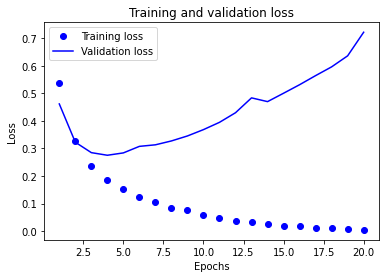

In [20]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

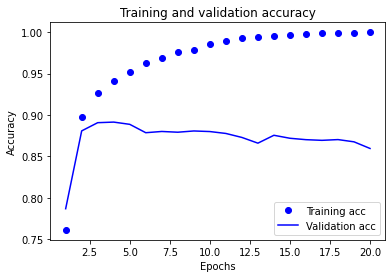

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.4752 - accuracy: 0.8105
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2643 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2025 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2976 - accuracy: 0.8824


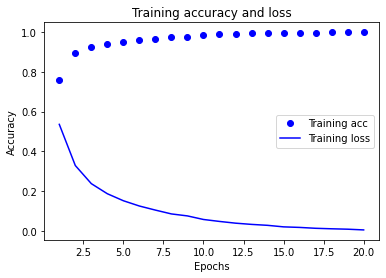

In [26]:
plt.clf()
acc = history_dict["accuracy"]
loss = history_dict["loss"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training accuracy and loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model.predict(x_test)

array([[0.18308651],
       [0.9999281 ],
       [0.8176171 ],
       ...,
       [0.09569904],
       [0.06063029],
       [0.43291727]], dtype=float32)